# pandas tutorials

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv( 'E:/kaggle/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.   #deviding it by 255 as each pixel is from 0 to 255 
_,m_train = X_train.shape

In [6]:

"""array([2, 1, 4, ..., 9, 7, 8])
Our NN will have a simple two-layer architecture. Input layer a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer a[1] will have 10 units with ReLU activation, and finally our output layer a[2] will have 10 units corresponding to the ten digit classes with softmax activation.

Forward propagation

Z[1]=W[1]X+b[1]  
A[1]=gReLU(Z[1]))
Z[2]=W[2]A[1]+b[2]
A[2]=gsoftmax(Z[2])
Backward propagation

dZ[2]=A[2]−Y             /derivatives of softmax and relu functions 
dW[2]=1mdZ[2]A[1]T
dB[2]=1mΣdZ[2]
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
dW[1]=1mdZ[1]A[0]T
dB[1]=1mΣdZ[1]
Parameter updates

W[2]:=W[2]−αdW[2]
b[2]:=b[2]−αdb[2] / alpha (α) is the learning rate 
W[1]:=W[1]−αdW[1] /changing weights and biases for better learning of the model
b[1]:=b[1]−αdb[1]



Vars and shapes

Forward prop

A[0]=X: 784 x m
Z[1]∼A[1]: 10 x m                  /here z means  =a layer in a neural network 
W[1]: 10 x 784 (as W[1]A[0]∼Z[1])
B[1]: 10 x 1
Z[2]∼A[2]: 10 x m
W[1]: 10 x 10 (as W[2]A[1]∼Z[2])
B[2]: 10 x 1
Backprop

dZ[2]: 10 x m ( A[2])
dW[2]: 10 x 10
dB[2]: 10 x 1
dZ[1]: 10 x m ( A[1])
dW[1]: 10 x 10
dB[1]: 10 x 1
"""

'array([2, 1, 4, ..., 9, 7, 8])\nOur NN will have a simple two-layer architecture. Input layer a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer a[1] will have 10 units with ReLU activation, and finally our output layer a[2] will have 10 units corresponding to the ten digit classes with softmax activation.\n\nForward propagation\n\nZ[1]=W[1]X+b[1]  \nA[1]=gReLU(Z[1]))\nZ[2]=W[2]A[1]+b[2]\nA[2]=gsoftmax(Z[2])\nBackward propagation\n\ndZ[2]=A[2]−Y             /derivatives of softmax and relu functions \ndW[2]=1mdZ[2]A[1]T\ndB[2]=1mΣdZ[2]\ndZ[1]=W[2]TdZ[2].∗g[1]′(z[1])\ndW[1]=1mdZ[1]A[0]T\ndB[1]=1mΣdZ[1]\nParameter updates\n\nW[2]:=W[2]−αdW[2]\nb[2]:=b[2]−αdb[2] / alpha (α) is the learning rate \nW[1]:=W[1]−αdW[1] /changing weights and biases for better learning of the model\nb[1]:=b[1]−αdb[1]\n\n\n\nVars and shapes\n\nForward prop\n\nA[0]=X: 784 x m\nZ[1]∼A[1]: 10 x m                  /here z means  =a layer in a neural network \nW[1]: 10 

In [9]:
y_train

NameError: name 'y_train' is not defined

In [10]:
np.random.rand(2,784)

array([[0.21397129, 0.43211244, 0.06369825, ..., 0.43931303, 0.73137173,
        0.58918666],
       [0.56541061, 0.78666888, 0.15747586, ..., 0.94571561, 0.51021148,
        0.45953339]])

### initiaalisinng the paraametres for wieghts and biass 

In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 2 7 ... 2 2 6] [9 6 4 ... 6 9 7]
0.06178048780487805
Iteration:  10
[6 0 7 ... 6 5 6] [9 6 4 ... 6 9 7]
0.15678048780487805
Iteration:  20
[4 0 7 ... 6 5 4] [9 6 4 ... 6 9 7]
0.2526829268292683
Iteration:  30
[4 0 7 ... 6 7 4] [9 6 4 ... 6 9 7]
0.33346341463414636
Iteration:  40
[4 6 7 ... 6 7 4] [9 6 4 ... 6 9 7]
0.42485365853658535
Iteration:  50
[4 6 7 ... 6 7 4] [9 6 4 ... 6 9 7]
0.4949268292682927
Iteration:  60
[4 6 7 ... 6 7 4] [9 6 4 ... 6 9 7]
0.5359756097560976
Iteration:  70
[4 6 9 ... 6 7 7] [9 6 4 ... 6 9 7]
0.5679756097560975
Iteration:  80
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.5959024390243902
Iteration:  90
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.6167560975609756
Iteration:  100
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.6353658536585366
Iteration:  110
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.6541219512195122
Iteration:  120
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.6694634146341464
Iteration:  130
[4 6 4 ... 6 7 7] [9 6 4 ... 6 9 7]
0.683609756097561
Iteration:  14

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


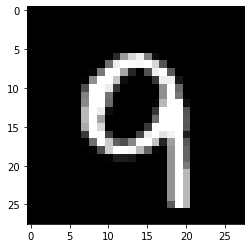

Prediction:  [6]
Label:  6


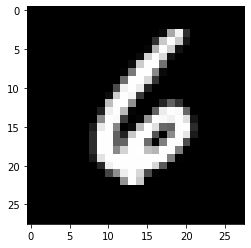

Prediction:  [4]
Label:  4


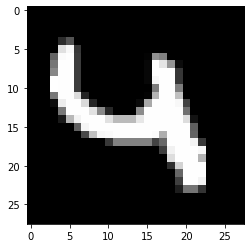

Prediction:  [6]
Label:  6


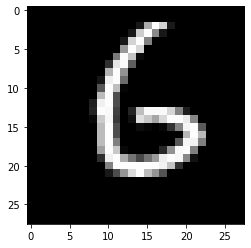

Prediction:  [6]
Label:  6


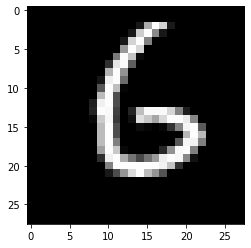

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


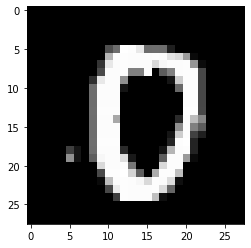

In [16]:
test_prediction(5, W1, b1, W2, b2)

In [17]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 5 8 5 0 1 3 6 4 8 3 5 2 1 1 0 1 8 7 2 6 3 8 5 7 8 7 7 7 8 5 8 3 1 7 7 8
 0 5 3 4 4 8 6 9 3 6 1 8 7 3 8 1 7 6 5 5 7 8 3 7 8 7 7 1 6 3 9 1 5 1 9 3 1
 7 5 3 5 4 6 8 1 1 0 3 4 0 5 5 5 7 5 3 9 5 9 0 2 6 3 8 2 2 2 5 8 5 7 6 1 9
 0 1 2 0 9 4 1 2 2 4 7 1 1 9 3 8 3 7 2 4 4 1 4 7 8 0 9 2 3 9 6 3 8 1 8 1 9
 6 8 3 6 2 9 3 3 6 9 2 4 1 9 1 0 0 8 4 7 9 2 1 6 6 1 3 2 4 9 5 1 9 3 7 8 4
 7 5 2 9 3 4 1 1 1 3 2 4 0 1 6 6 3 0 0 0 7 1 3 3 8 7 6 8 5 6 8 9 0 7 3 2 1
 2 6 1 4 0 0 9 5 3 4 3 5 0 3 7 7 8 6 4 6 9 6 5 7 1 0 9 9 6 4 6 5 1 1 1 5 4
 7 4 9 6 9 9 9 7 5 6 8 0 7 1 7 2 1 9 0 3 0 7 6 9 3 7 1 6 1 9 3 2 5 1 1 6 8
 4 7 4 0 9 0 2 8 5 8 2 7 1 5 1 3 1 9 1 8 0 8 0 5 6 1 7 0 1 3 5 6 2 1 1 0 1
 3 8 2 0 3 9 5 6 0 1 2 3 0 8 5 7 1 2 4 6 1 5 5 0 4 3 6 4 2 9 0 7 0 9 1 7 9
 3 8 1 1 0 3 7 7 9 8 0 5 1 2 1 5 3 7 3 4 1 1 0 0 4 7 4 0 0 9 2 3 2 4 7 6 1
 3 1 4 9 8 5 2 9 0 2 8 9 5 8 3 6 9 8 4 5 8 1 4 5 2 7 8 2 1 0 7 9 7 0 7 9 2
 0 0 8 1 0 9 3 7 8 3 4 4 8 3 3 6 1 0 6 7 7 0 6 9 2 2 9 0 7 1 9 3 1 1 9 1 4
 4 4 9 1 4 7 6 6 6 6 7 1 

0.866

Prediction:  [0]
Label:  0


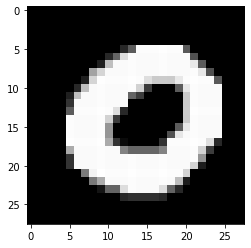

In [25]:
test_prediction(212, W1, b1, W2, b2)